In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
df = pd.read_csv('csv/ldpr_walls.csv')

df.head()

,id,text,date,views,reposts,likes
0,708300,❕ ЛДПР поможет заменить управляющую компанию\n...,2024-04-20,2495.0,6,105
1,708294,🙏 ЛДПР защитит обманутых дольщиков \n \nВ рамк...,2024-04-20,1611.0,3,48
2,708290,❕ Леонид Слуцкий поможет привести подвал жилог...,2024-04-20,1788.0,3,49
3,708289,❕ Председатель ЛДПР Леонид Слуцкий провел Всер...,2024-04-20,2229.0,6,81
4,708274,❕ ЛДПР предлагает расширить перечень мер подде...,2024-04-19,4933.0,2,91


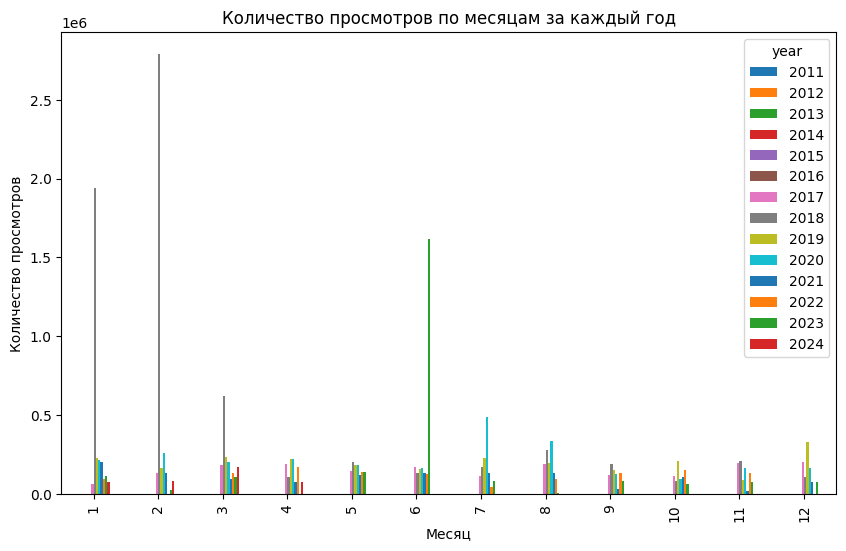

In [11]:

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df_pivot = df.pivot_table(index='month', columns='year', values='views', aggfunc='sum')

df_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Количество просмотров по месяцам за каждый год')
plt.xlabel('Месяц')
plt.ylabel('Количество просмотров')
plt.show()



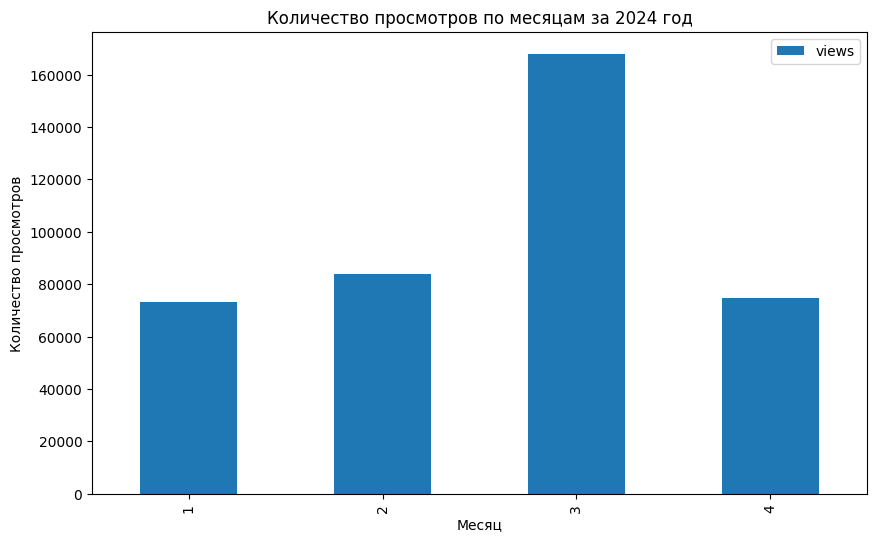

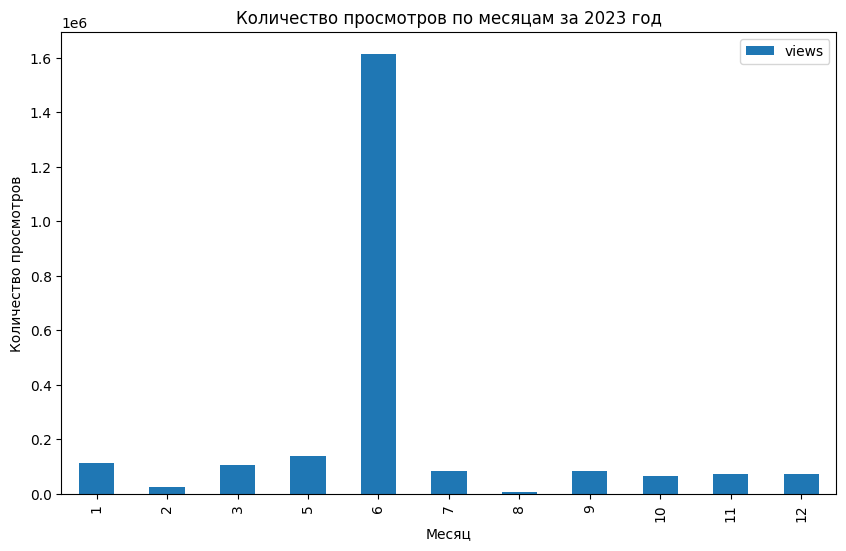

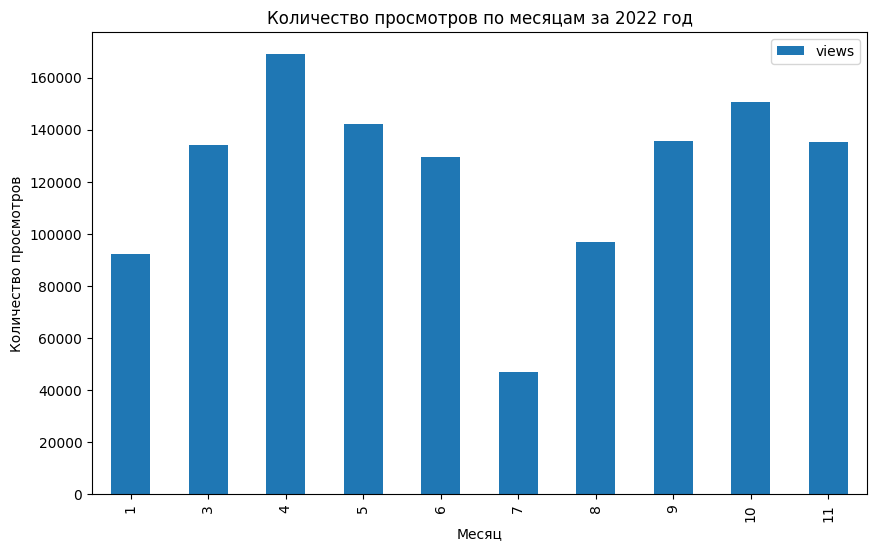

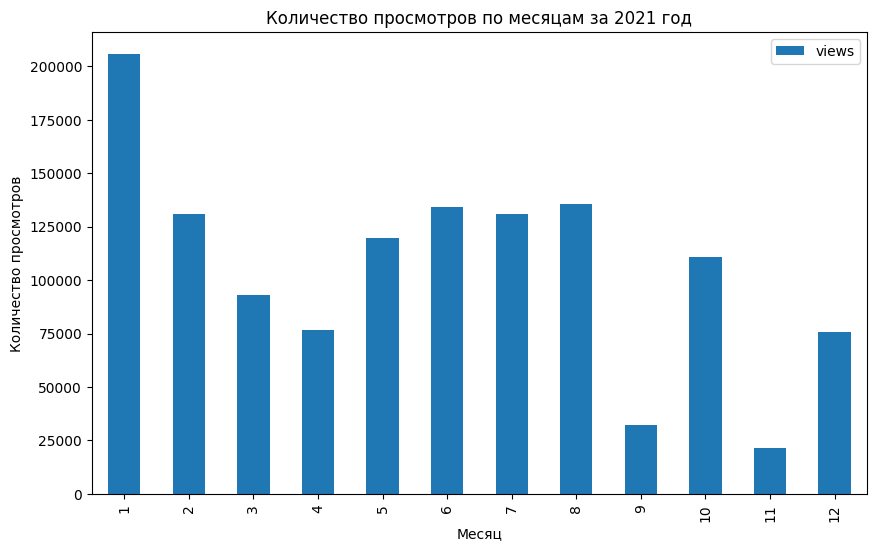

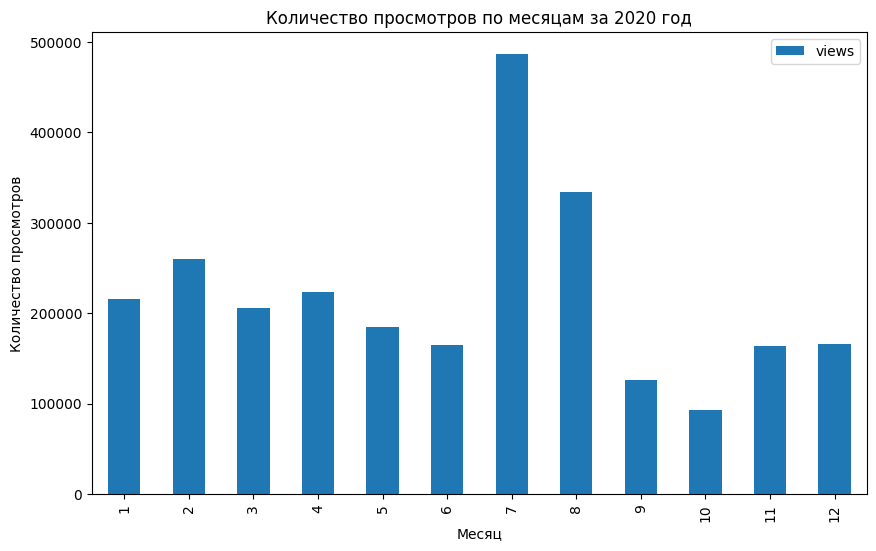

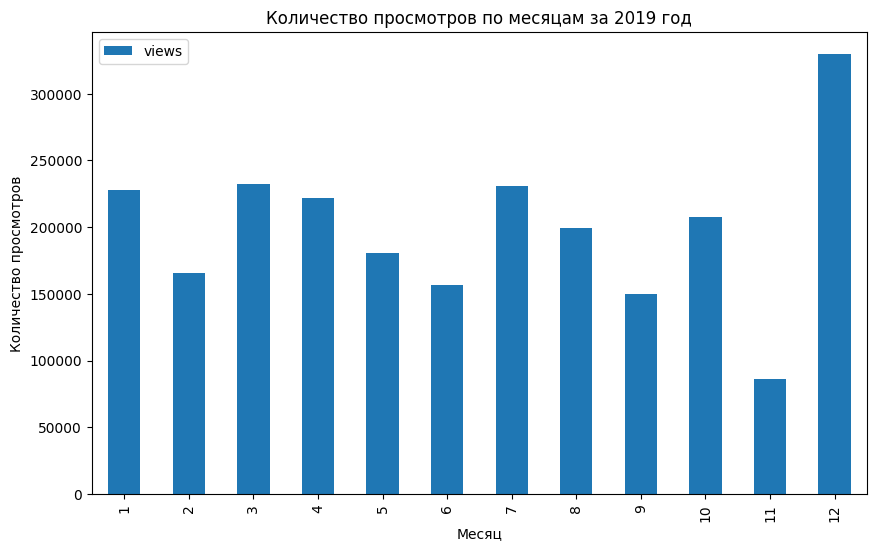

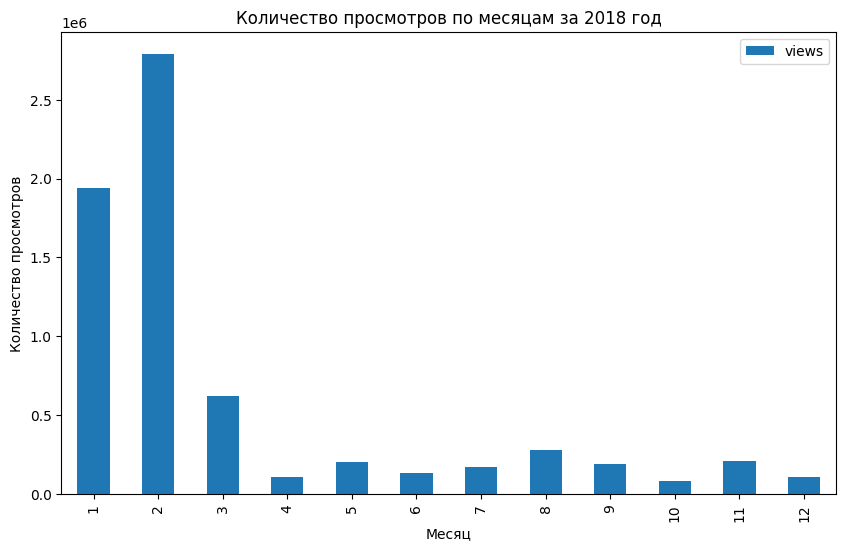

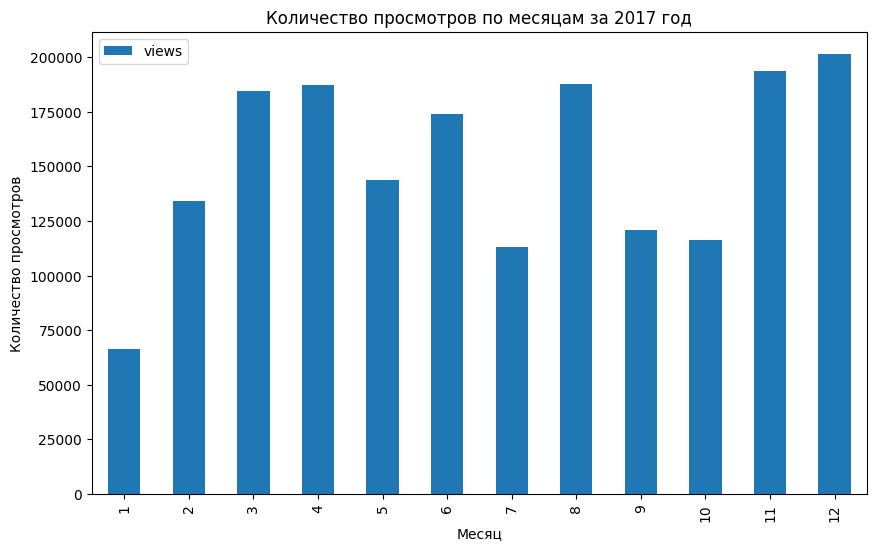

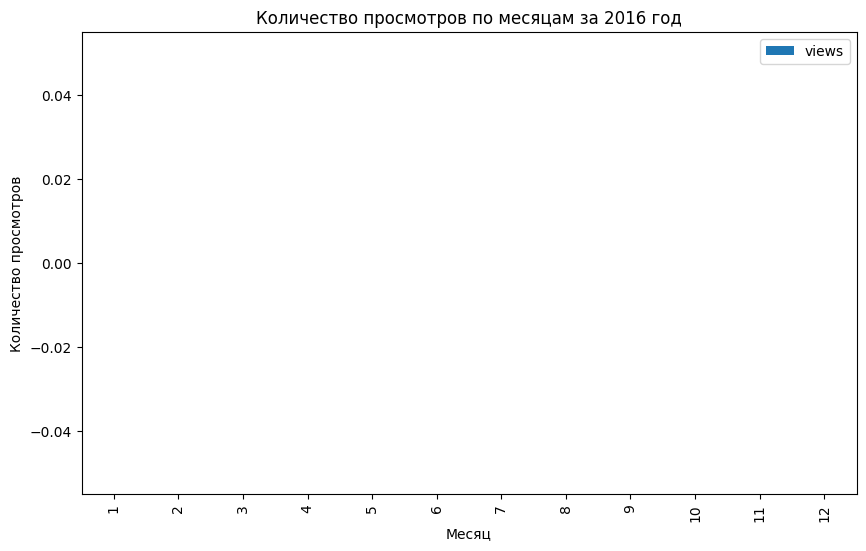

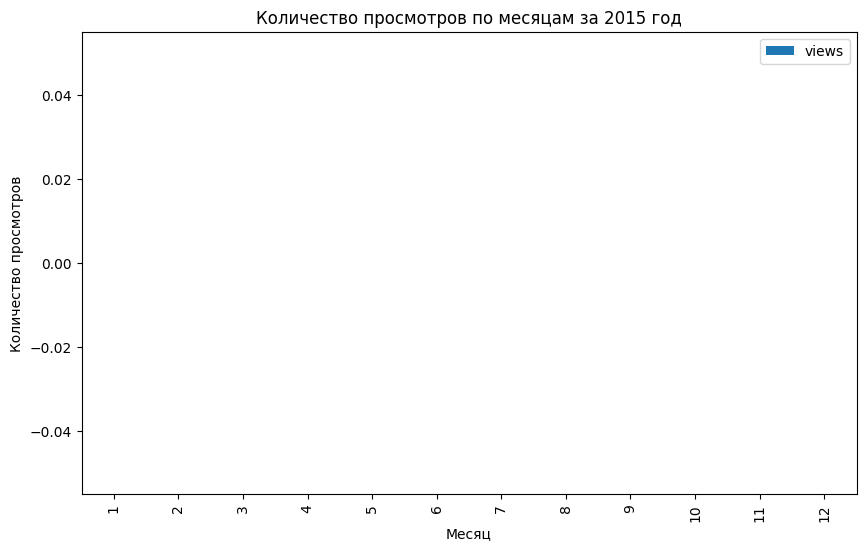

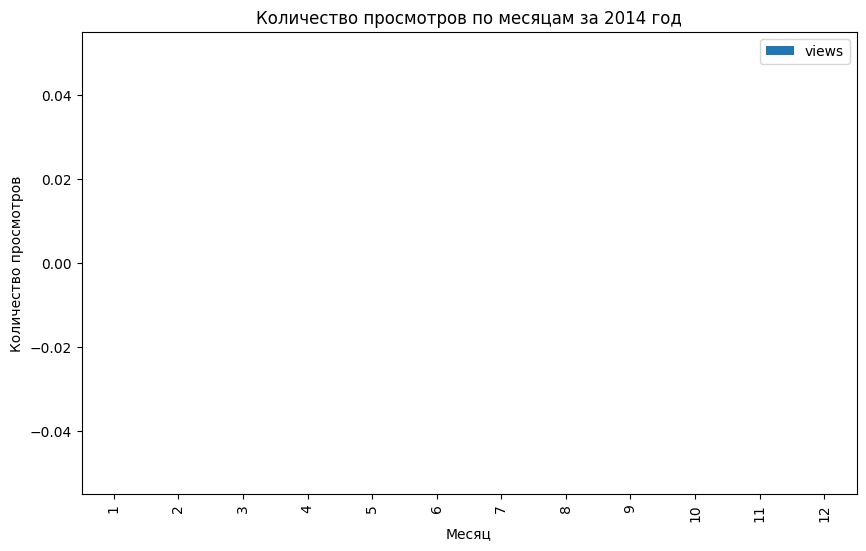

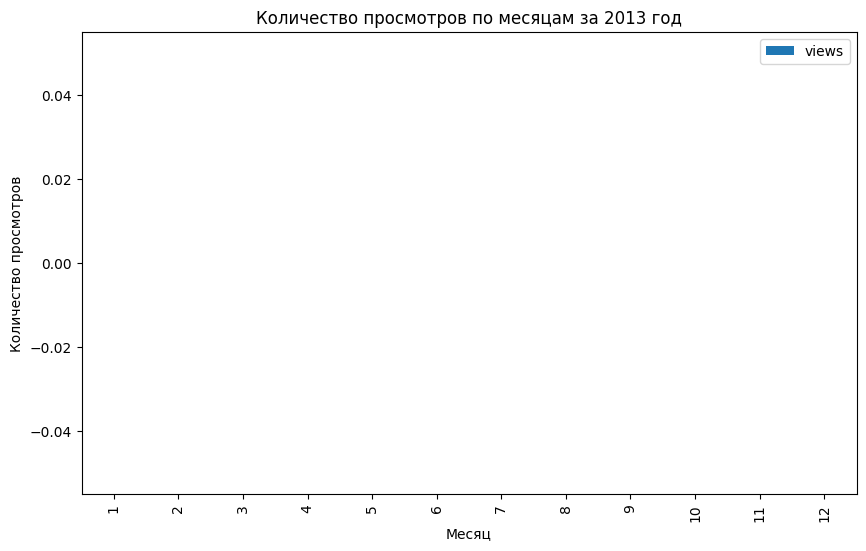

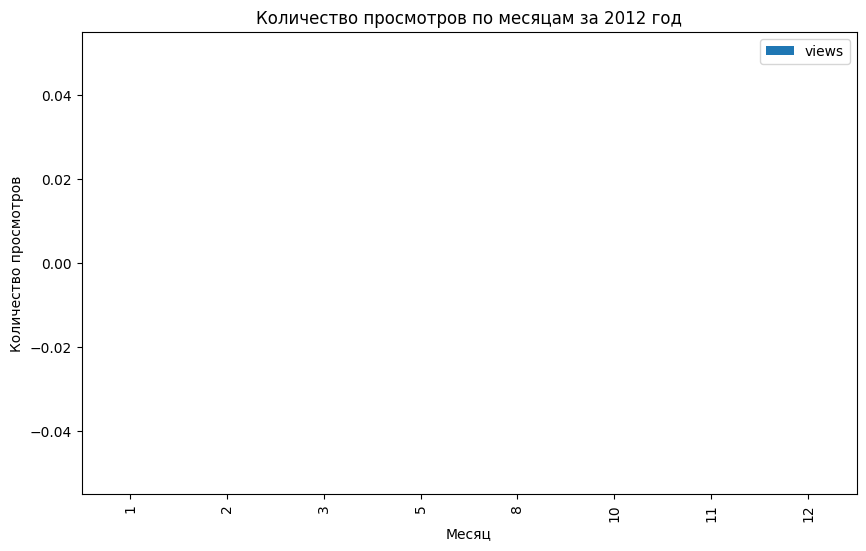

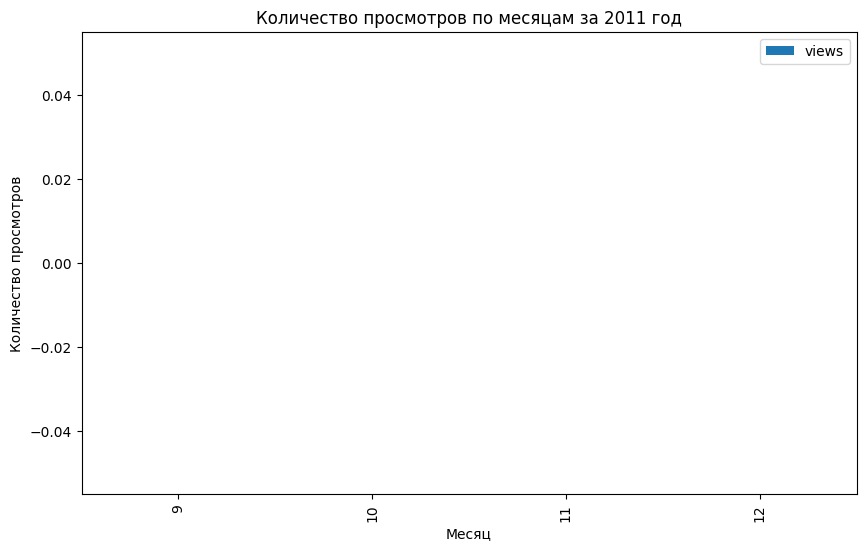

In [12]:
for year in df['year'].unique():
    df_year = df[df['year'] == year]
    df_year_pivot = df_year.pivot_table(index='month', values='views', aggfunc='sum')
    df_year_pivot.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Количество просмотров по месяцам за {year} год')
    plt.xlabel('Месяц')
    plt.ylabel('Количество просмотров')
    plt.show()


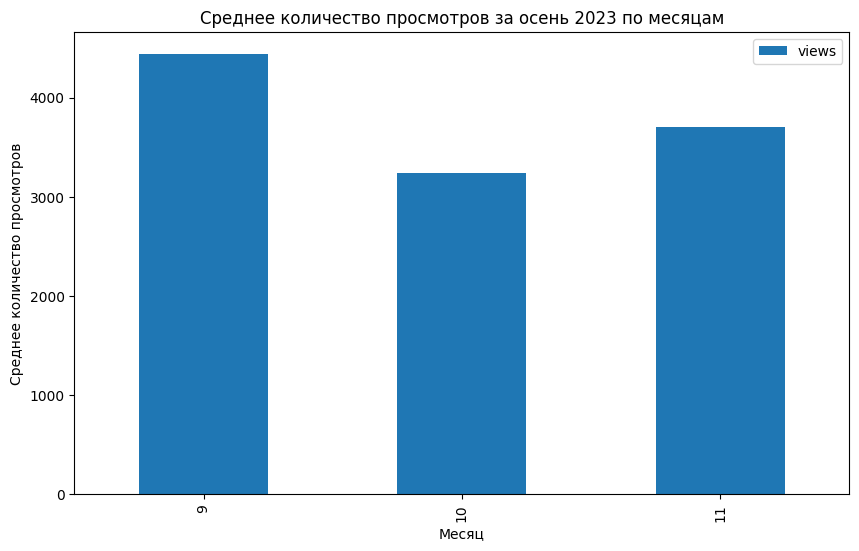

In [13]:
df_autumn_2023 = df[(df['year'] == 2023) & (df['month'] >= 9) & (df['month'] <= 11)]
df_autumn_2023_pivot = df_autumn_2023.pivot_table(index='month', values='views', aggfunc='mean')
df_autumn_2023_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Среднее количество просмотров за осень 2023 по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество просмотров')
plt.show()


In [14]:
df_autumn_2023_pivot = df_autumn_2023.pivot_table(index='month', values='views', aggfunc='mean')
df_autumn_2023_pivot


,views
month,
9,4439.526316
10,3235.950000
11,3702.550000


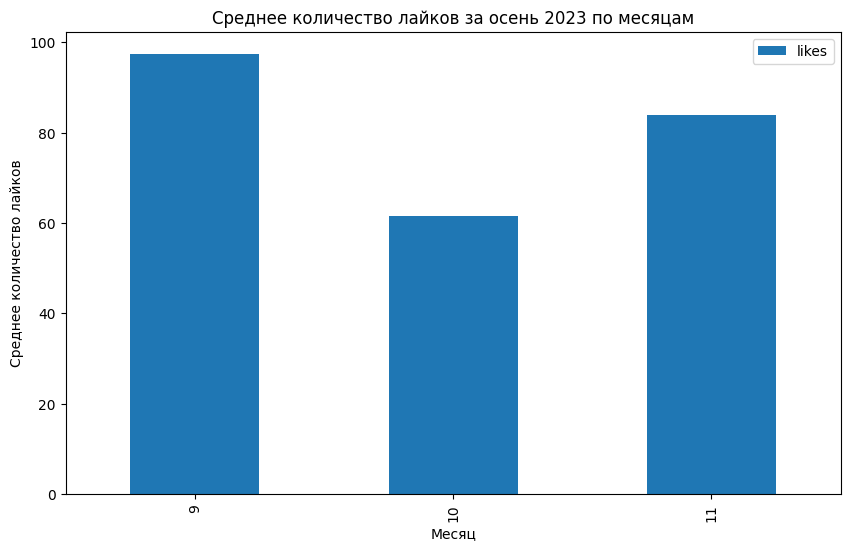

,likes
month,
9,97.421053
10,61.550000
11,83.800000


In [15]:
df_autumn_2023_likes = df_autumn_2023.pivot_table(index='month', values='likes', aggfunc='mean')
df_autumn_2023_likes.plot(kind='bar', figsize=(10, 6))
plt.title('Среднее количество лайков за осень 2023 по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество лайков')
plt.show()

df_autumn_2023_likes


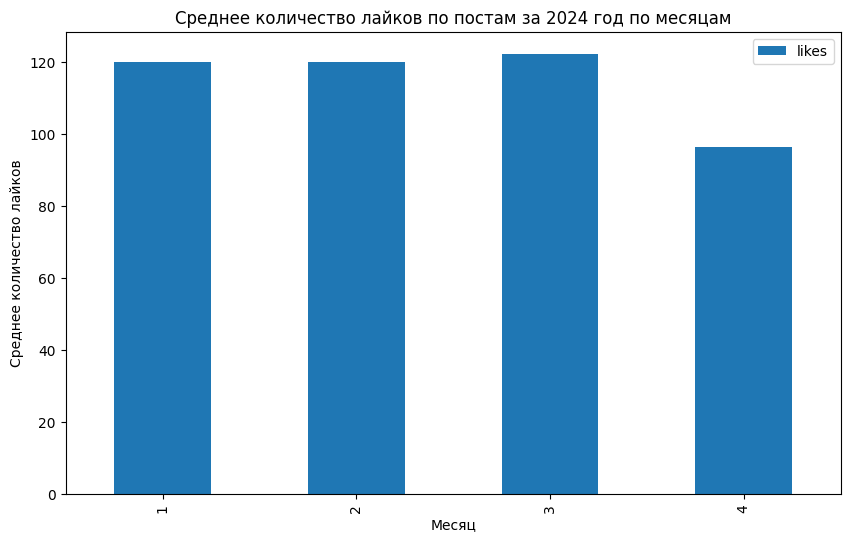

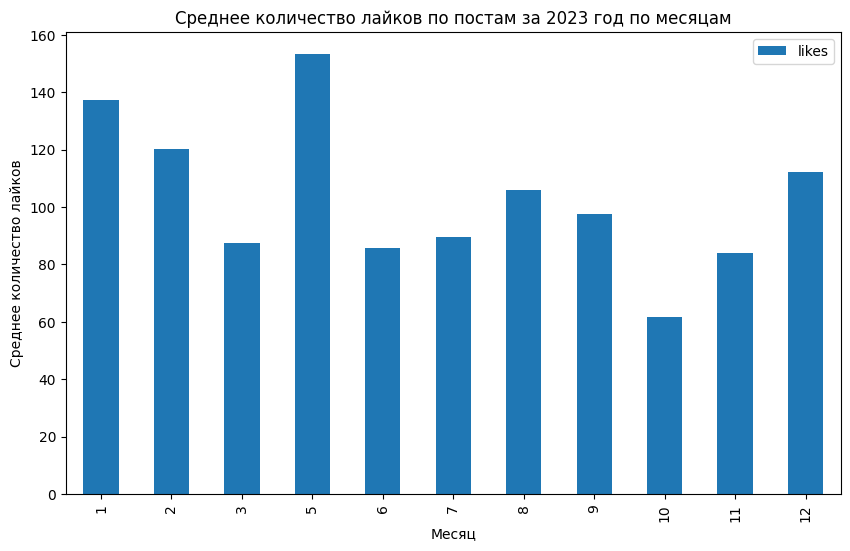

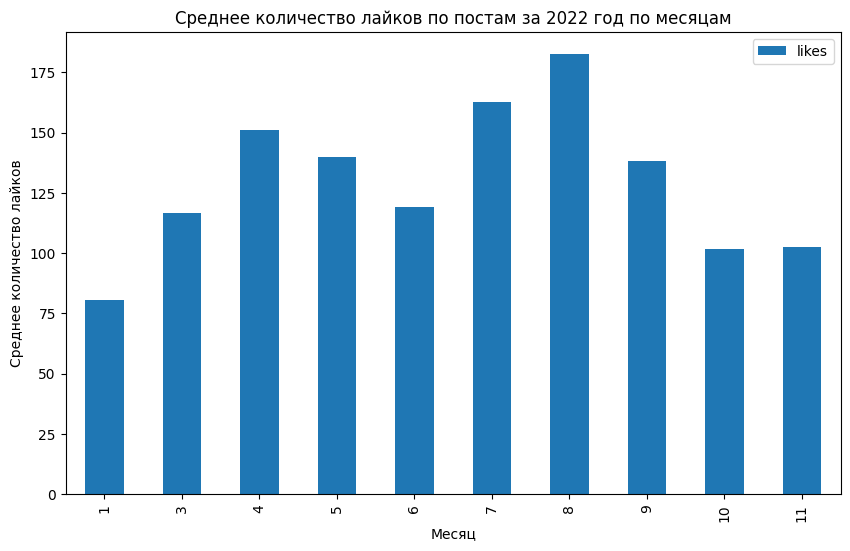

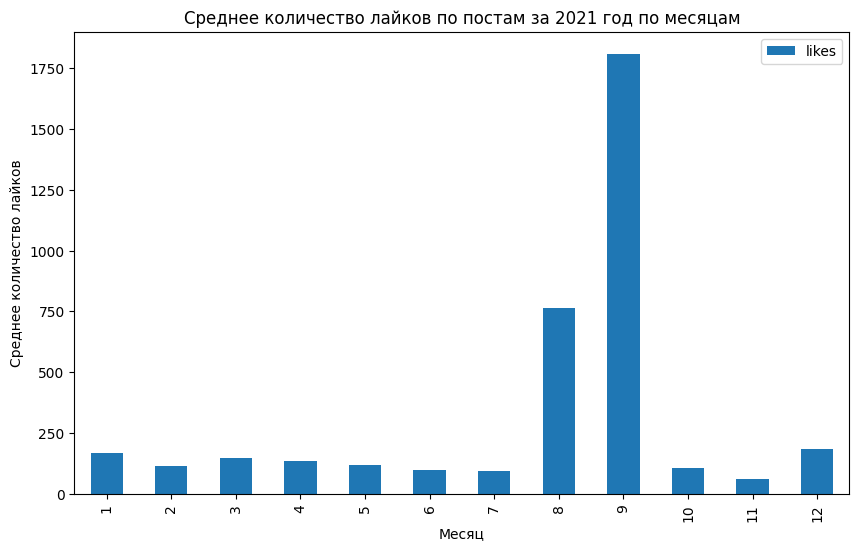

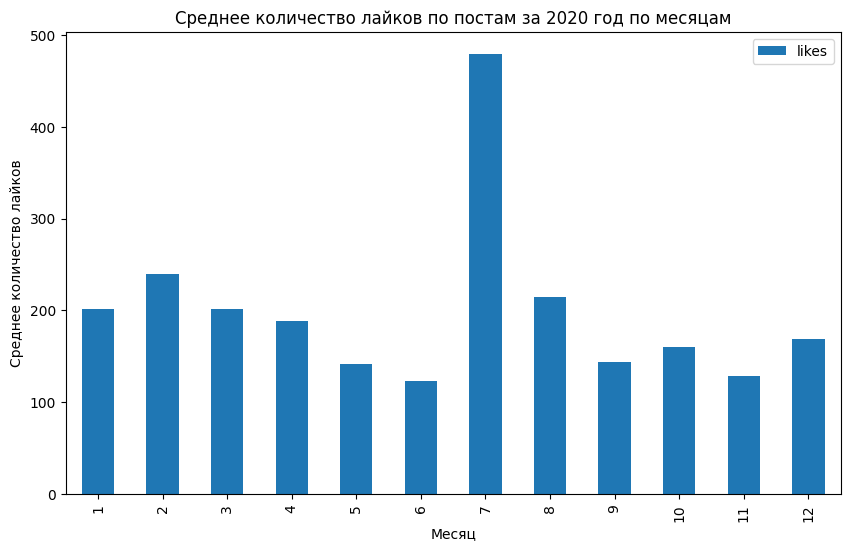

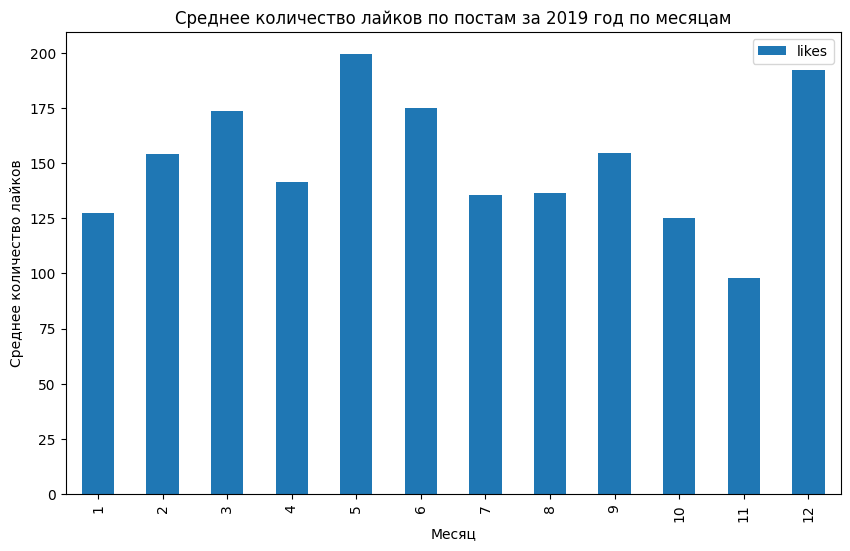

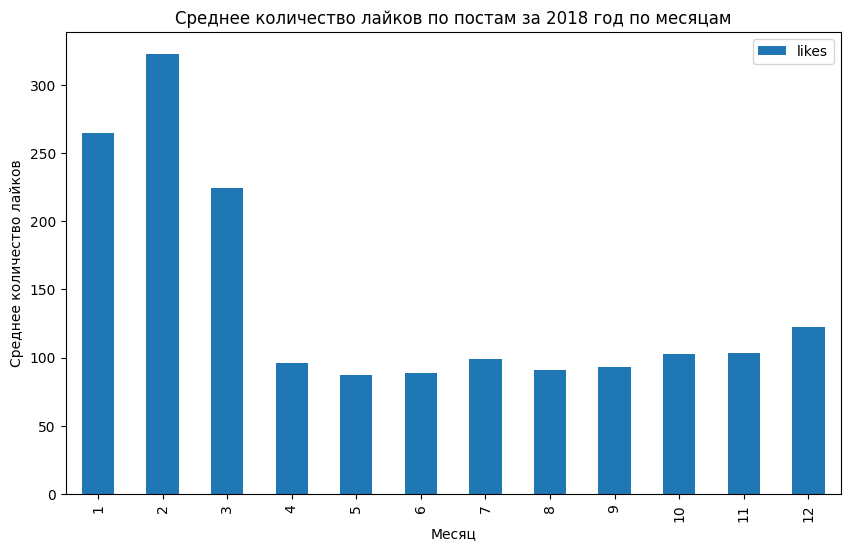

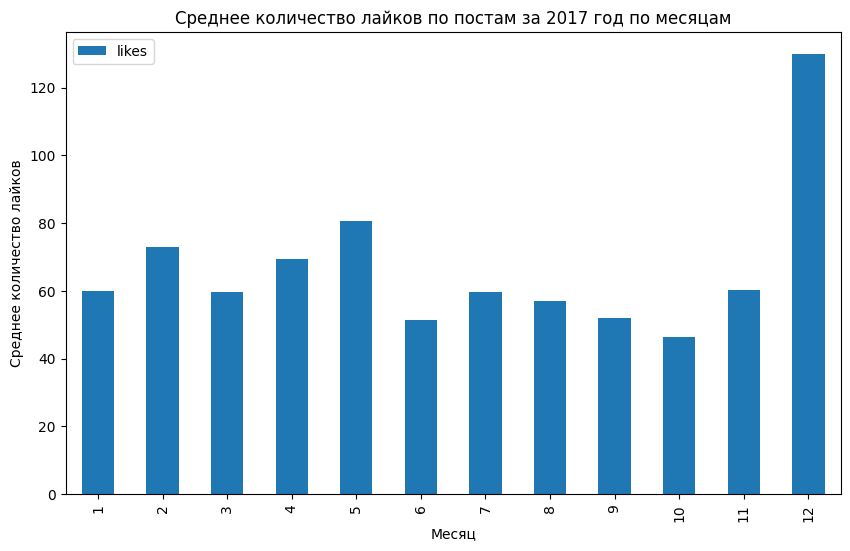

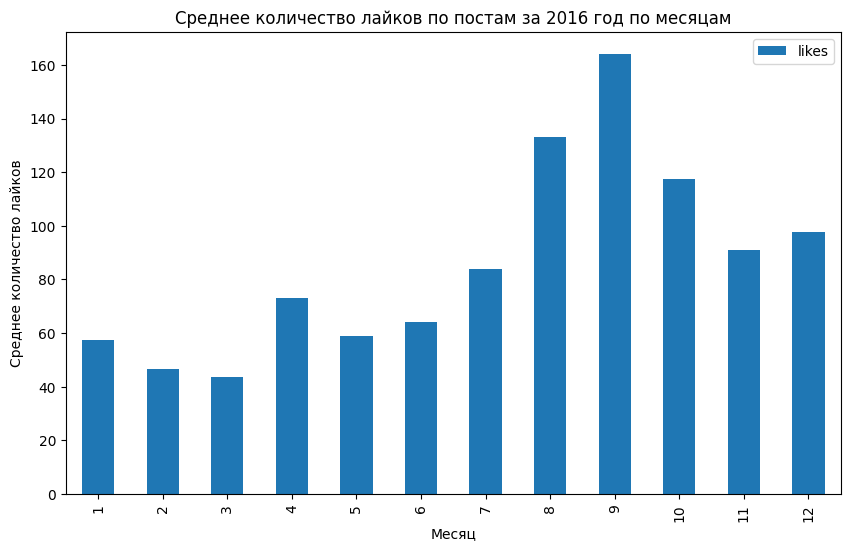

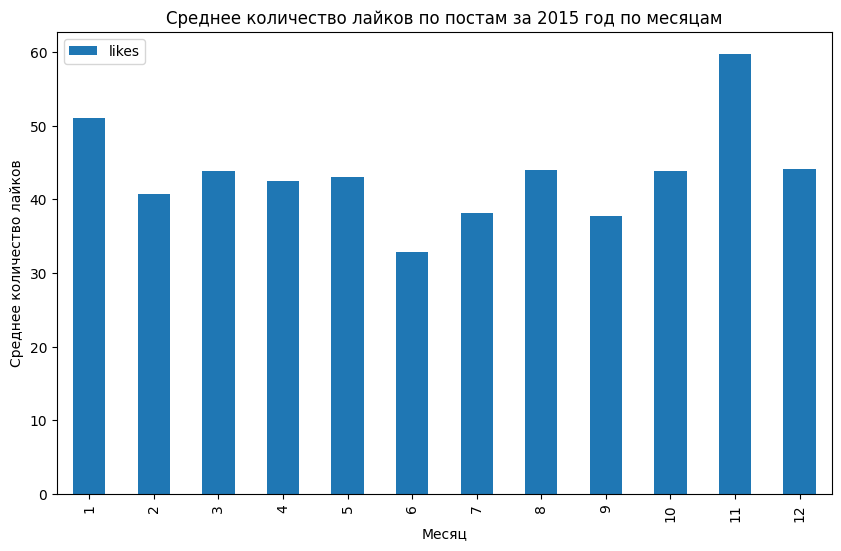

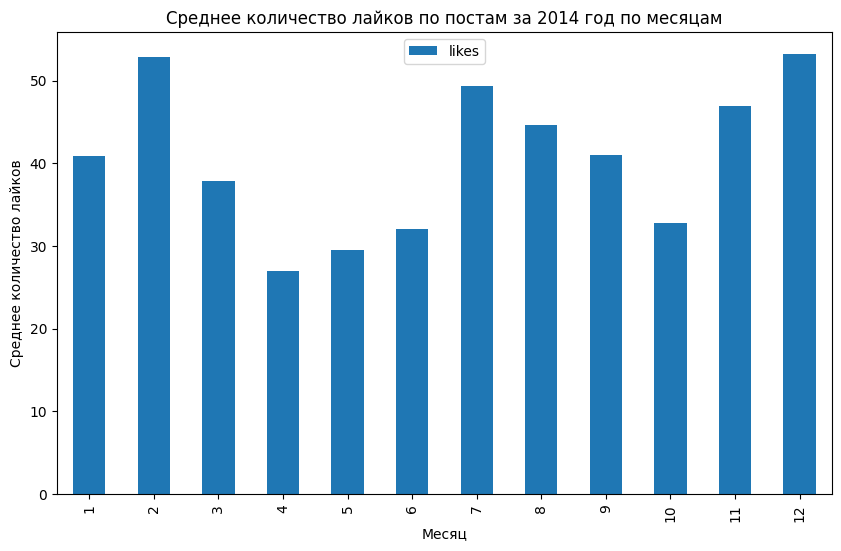

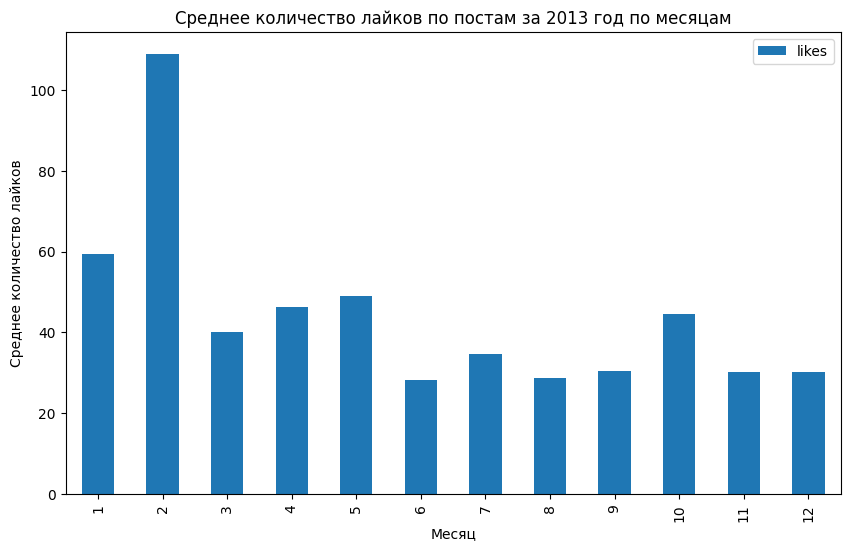

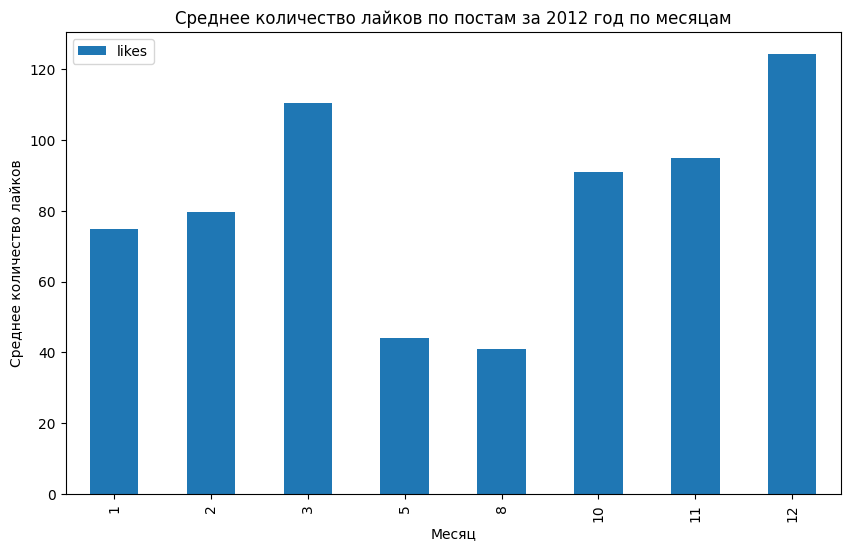

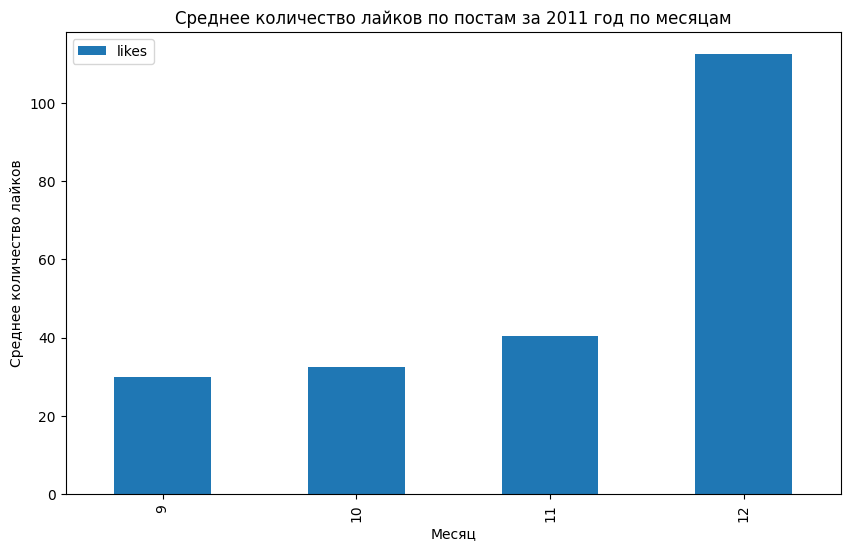

In [16]:
for year in df['year'].unique():
    df_year = df[df['year'] == year]
    df_year_likes = df_year.pivot_table(index='month', values='likes', aggfunc='mean')
    df_year_likes.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Среднее количество лайков по постам за {year} год по месяцам')
    plt.xlabel('Месяц')
    plt.ylabel('Среднее количество лайков')
    plt.show()
